In [23]:
%matplotlib inline 
import matplotlib.pyplot as plt 
#scikit learn has it own handwritten number images, lets import it....
from sklearn.datasets import load_digits

In [24]:
digits=load_digits()

In [25]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [26]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

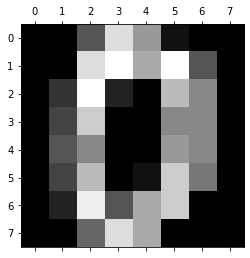

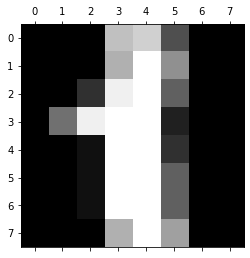

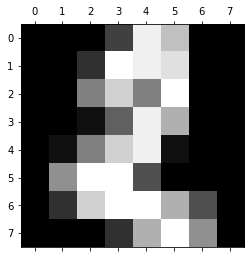

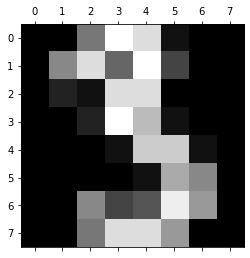

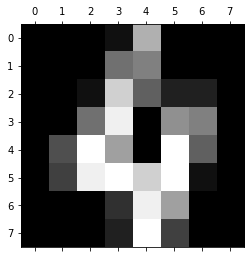

In [27]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [28]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [29]:
#test train your model 
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [31]:
len(X_test)

360

In [32]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()

In [33]:
#train your  model 
model.fit(X_train,y_train)

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model.score(X_test,y_test) #accuracy is good 0.9555

0.9555555555555556

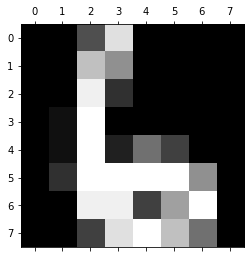

In [36]:
plt.matshow(digits.images[67])

In [37]:
#at index 67 the target image is 6
digits.target[67]

6

In [38]:
#let the model recognize/predict value 6,here 67 is the index 
model.predict([digits.data[67]])

array([6])

In [40]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

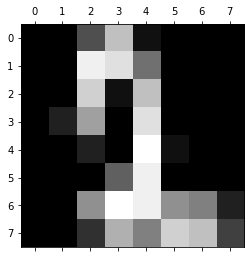

In [43]:
#let the model recognize/predict value 2, here 12 is the index of the array in which value image 2 is held 
plt.matshow(digits.images[12])

In [42]:
model.predict([digits.data[12]])

array([2])

In [45]:
#confusion matrix-->the model has 95% accuracy, but we want to know the 5% where it failed
y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predicted)
cm


array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 27]], dtype=int64)

Text(69.0, 0.5, 'Truth')

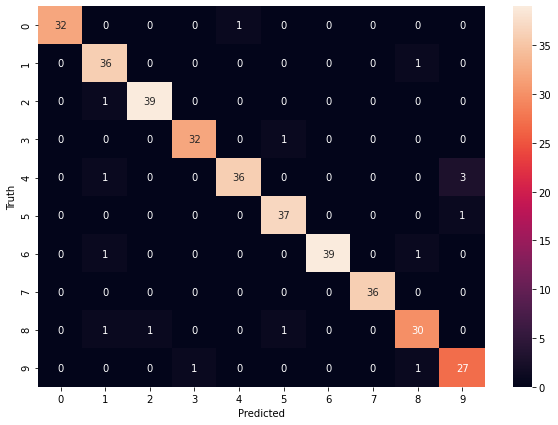

In [46]:
#confusion matrix-->the model has 95% accuracy, but we want to know the 5% where it failed
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')